In [2]:
import numpy as np
import Acceleration as Ace
import scvelo as scv
import MyCodePloting as mc
import MyCodeTools as mt
scv.logging.print_version()

Running scvelo 0.2.5 (python 3.10.2) on 2023-05-04 18:52.


In [3]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [4]:
adata = scv.datasets.dentategyrus()
adata

AnnData object with n_obs × n_vars = 2930 × 13913
    obs: 'clusters', 'age(days)', 'clusters_enlarged'
    uns: 'clusters_colors'
    obsm: 'X_umap'
    layers: 'ambiguous', 'spliced', 'unspliced'

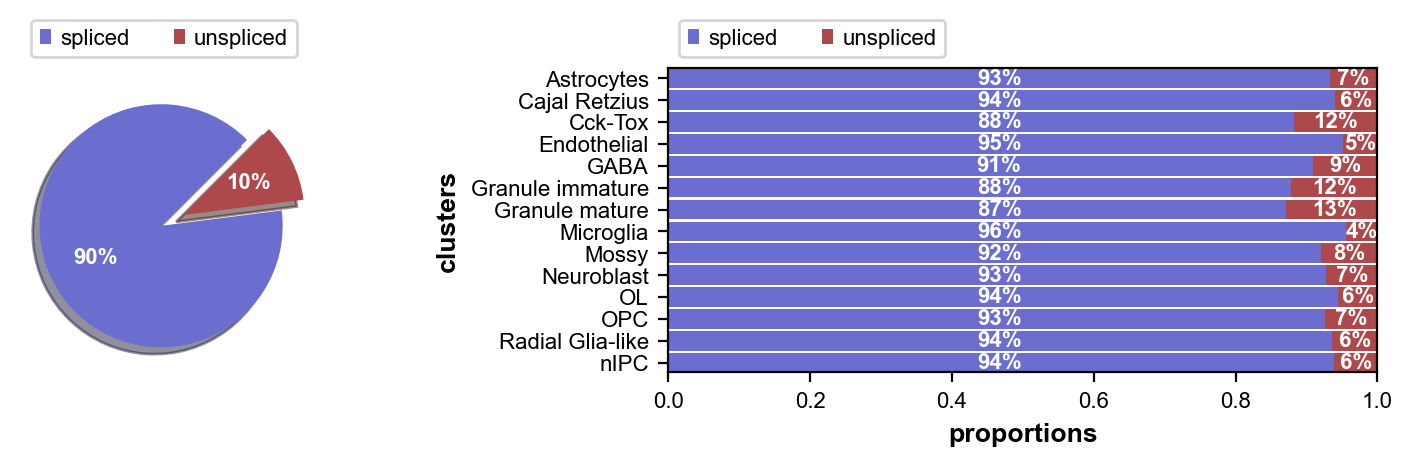

In [5]:
scv.pl.proportions(adata)

In [6]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 10340 genes that are detected 20 counts (shared).
Normalized count data: X, spliced, unspliced.
Extracted 2000 highly variable genes.


In [7]:
scv.pp.filter_genes(adata, min_shared_counts=20)
scv.pp.normalize_per_cell(adata)
scv.pp.filter_genes_dispersion(adata, n_top_genes=2000)
scv.pp.log1p(adata)

Filtered out 176 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.


In [8]:
scv.pp.filter_and_normalize(adata, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Skip filtering by dispersion since number of variables are less than `n_top_genes`.
computing neighbors
    finished (0:00:41) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [9]:
Spliced = adata.to_df(layer='Ms')+1
Unspliced = adata.to_df(layer='Mu')+1

In [10]:
scv.tl.velocity(adata)
gamma = adata.var['velocity_gamma']
acc = Unspliced - (1+gamma)*Unspliced + (gamma**2)*(Spliced)   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


index,Tcea1,Rb1cc1,Prex2,A830018L16Rik,Paqr8,Khdrbs2,Arhgef4,Unc50,Eif5b,Mrps9,...,Itm2a,Pcdh19,Tspan6,Bex2,Tceal5,Sms,Cnksr2,Zrsr2,Ofd1,Tmsb4x
index,,,,,,,,,,,,,,,,,,,,,
AAACATACCCATGA,-0.168399,-0.214452,0.935148,-0.035269,1.022112,3.531277,-0.104691,-0.034223,-0.120956,-0.118149,...,-0.007923,-0.058908,-0.043055,-0.008517,-0.086937,-0.033181,-0.278594,-0.140147,-0.243540,-0.001365
AAACATACCGTAGT,-0.171645,-0.224440,0.613500,0.090721,0.747236,3.511383,-0.109220,-0.035739,-0.146211,-0.124336,...,-0.007923,-0.059097,-0.042726,-0.008632,-0.087383,-0.033693,-0.235860,-0.141843,-0.249973,-0.001411
AAACATACGAGAGC,-0.181871,-0.191163,1.106708,-0.029270,0.950125,3.624213,-0.105893,-0.034032,-0.110800,-0.123789,...,-0.007923,-0.058027,-0.043104,-0.008273,-0.085648,-0.033348,-0.279802,-0.135796,-0.238631,-0.001375
AAACATACTGAGGG,-0.173540,-0.185528,1.028440,-0.033141,0.978145,3.887435,-0.108052,-0.034619,-0.115860,-0.130780,...,-0.007923,-0.058576,-0.042936,-0.008543,-0.087123,-0.033045,-0.295978,-0.142802,-0.249162,-0.001372
AAACATTGGCATCA,-0.176143,-0.191508,0.857330,0.037087,0.960046,3.440398,-0.102954,-0.034105,-0.119929,-0.121648,...,-0.007923,-0.057545,-0.043404,-0.008390,-0.088480,-0.033229,-0.254428,-0.141077,-0.251785,-0.001382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTACTTCCCGT,-0.174375,-0.178937,0.950016,0.024365,1.007856,3.711606,-0.106668,-0.034026,-0.123442,-0.126605,...,-0.007916,-0.058651,-0.042979,-0.008643,-0.084371,-0.033059,-0.278159,-0.138014,-0.249973,-0.001345
TTTGACTGCCTGTC,-0.190259,-0.261265,0.953802,0.023312,0.963385,2.729374,-0.115861,-0.034196,-0.132470,-0.125430,...,-0.007923,-0.059097,-0.048365,-0.008521,-0.085380,-0.033121,-0.293778,-0.142109,-0.240686,-0.001360
TTTGACTGTCTGGA,-0.180265,-0.200365,1.047256,0.006959,0.927216,3.595616,-0.104216,-0.034852,-0.123407,-0.123614,...,-0.007923,-0.058241,-0.043054,-0.008343,-0.085546,-0.033811,-0.286527,-0.140091,-0.242076,-0.001377


In [11]:
adata.layers['acc'] = acc
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:41) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:01) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


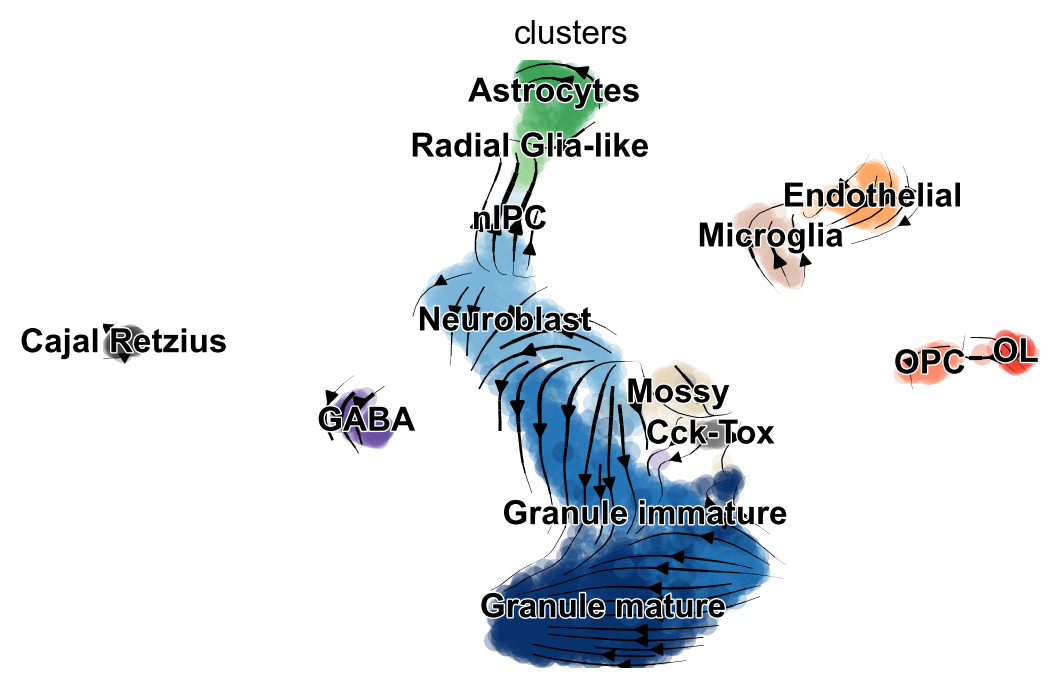

In [12]:
mc.acc_embedding_stream(adata)

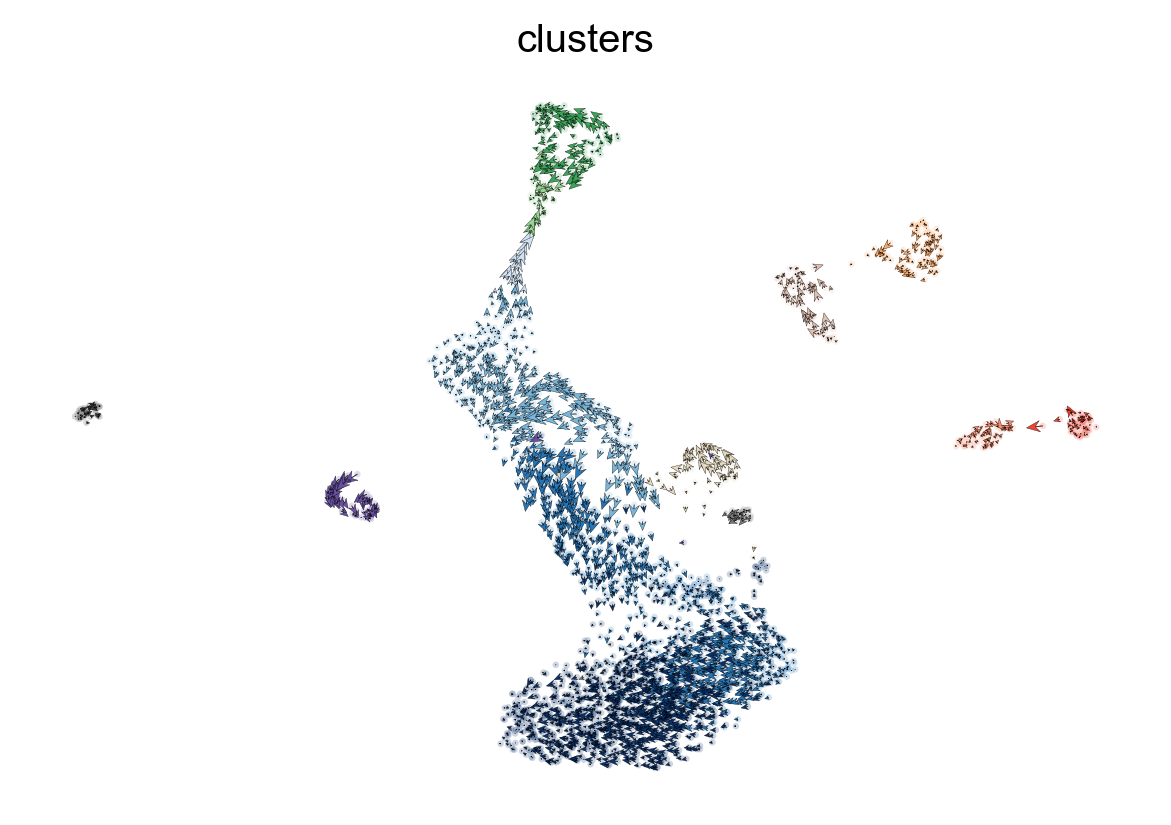

In [13]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

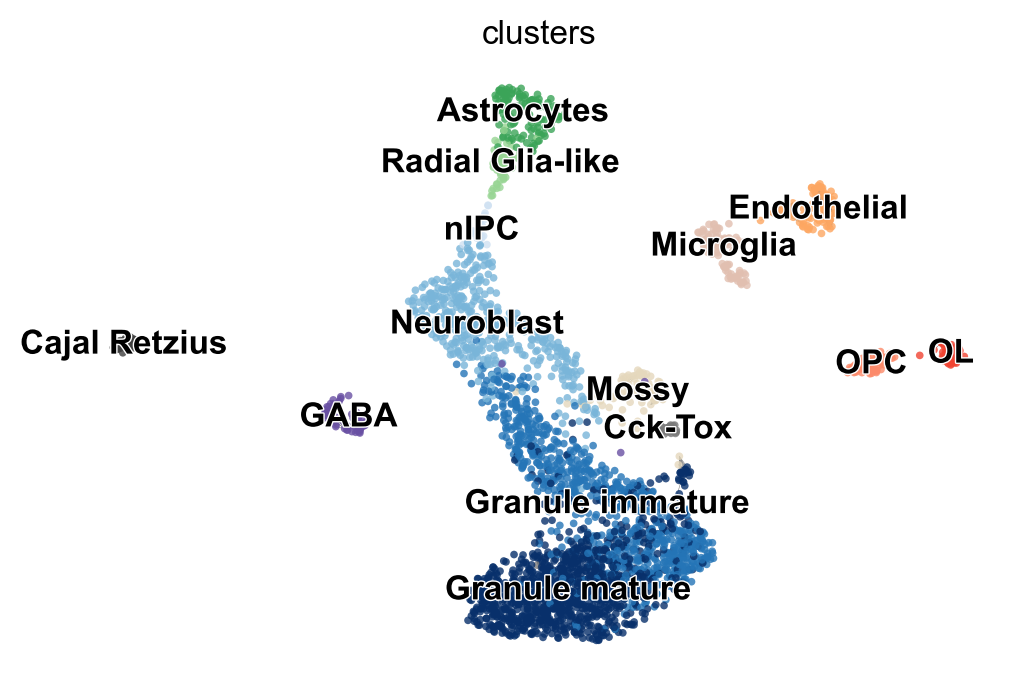

In [14]:
mc.acc_graph(adata)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)
--> added 'acc_confidence_transition' (adata.obs)


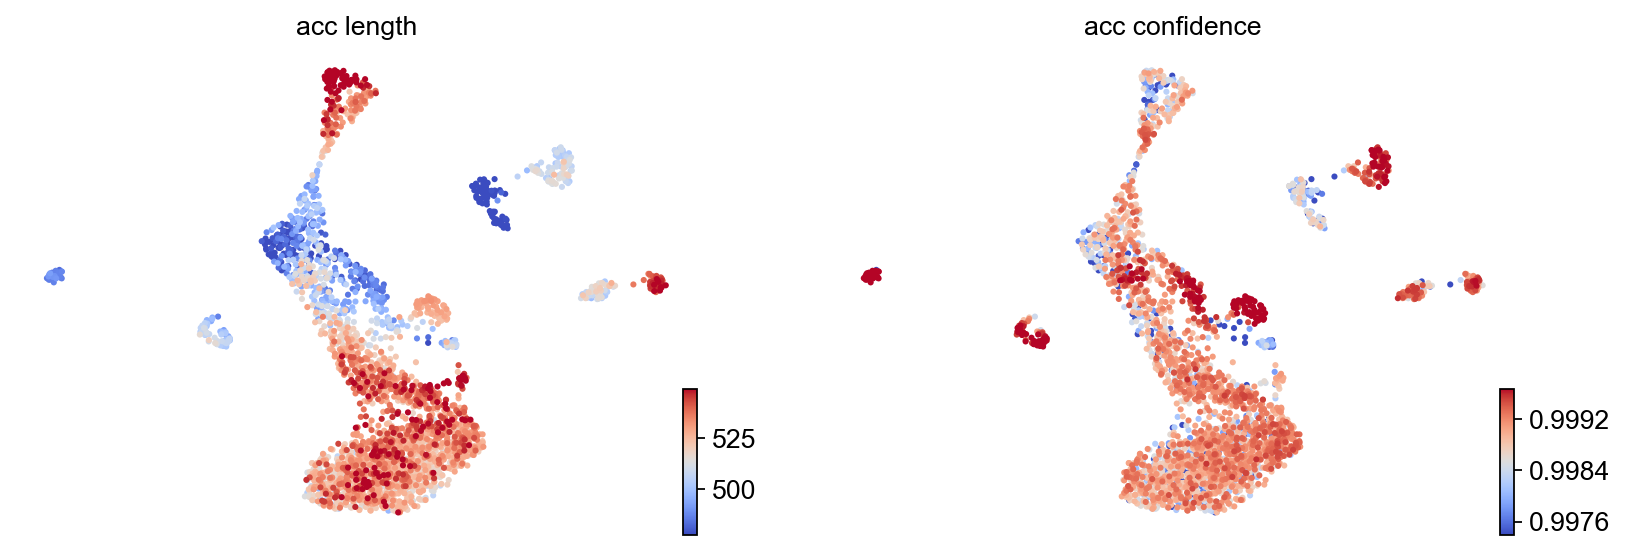

In [15]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])

#### Steady State

In [16]:
gamma1 = Spliced/Unspliced
acc1 = Unspliced - (1+gamma1)*Unspliced + (gamma1**2)*(Spliced)   # Mu - (1+gamma)*Mu + (gamma**2)*Ms
acc1

index,Tcea1,Rb1cc1,Prex2,A830018L16Rik,Paqr8,Khdrbs2,Arhgef4,Unc50,Eif5b,Mrps9,...,Itm2a,Pcdh19,Tspan6,Bex2,Tceal5,Sms,Cnksr2,Zrsr2,Ofd1,Tmsb4x
index,,,,,,,,,,,,,,,,,,,,,
AAACATACCCATGA,0.372685,0.296213,-0.220285,-0.213822,0.058980,-0.058367,1.381903,0.187668,1.907833,1.513955,...,0.000000,2.338905,0.049451,220.460983,0.979996,1.441621,-0.034599,0.200288,0.054646,20107.003906
AAACATACCGTAGT,1.314349,0.323050,-0.771259,0.000000,-0.281330,0.000000,0.000000,3.336009,0.131658,0.405334,...,0.000000,0.000000,0.479594,18.584311,0.178646,0.000000,0.000000,0.065322,0.000000,94.418556
AAACATACGAGAGC,-0.014089,0.417413,-0.068136,-0.214166,0.000000,-0.102643,0.573876,0.644105,3.288164,0.480739,...,0.000000,0.774749,0.000000,391.110352,2.200701,0.826784,-0.035280,0.646107,0.099199,10969.512695
AAACATACTGAGGG,0.021358,0.327013,-0.128721,-0.206364,0.022380,0.114000,0.354459,0.214652,2.241628,0.251842,...,0.016223,0.316218,0.185012,245.009506,0.922214,2.061566,-0.241619,0.143963,0.006657,33211.246094
AAACATTGGCATCA,0.163006,0.598843,-0.273247,-0.125860,-0.013966,-0.152621,1.355321,0.452107,1.712209,0.816416,...,0.000000,1.296131,0.090434,346.859222,1.852842,1.249950,0.093230,0.206606,0.002445,15593.061523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCTACTTCCCGT,0.034927,0.620050,-0.179043,-0.117685,0.046912,0.009332,0.412522,0.661680,1.766249,0.134843,...,0.276942,0.263744,0.134088,319.196136,1.320629,1.992982,-0.137406,0.400220,0.000000,50487.261719
TTTGACTGCCTGTC,-0.090228,-0.353219,-0.175664,-0.113689,-0.029174,-0.426575,0.013328,0.243520,0.884131,0.266543,...,0.000000,0.000000,0.304722,69.464218,0.854652,1.699856,-0.246451,0.045945,0.080242,26585.658203
TTTGACTGTCTGGA,-0.049281,0.209862,-0.112366,-0.156624,-0.037340,-0.126681,1.182874,0.286459,1.894399,0.635855,...,0.000000,1.049002,0.050095,494.177002,2.442419,1.420454,-0.121660,0.205085,0.067675,10032.791016


In [17]:
adata.layers['acc'] = acc1
Ace.acc_graph(adata)

computing acceleration graph (using 1/8 cores)


  0%|          | 0/2930 [00:00<?, ?cells/s]

    finished (0:00:42) --> added 
    'acc_graph', sparse matrix with cosine correlations (adata.uns)


computing acc embedding
    finished (0:00:01) --> added
    'acc_umap', embedded acc vectors (adata.obsm)


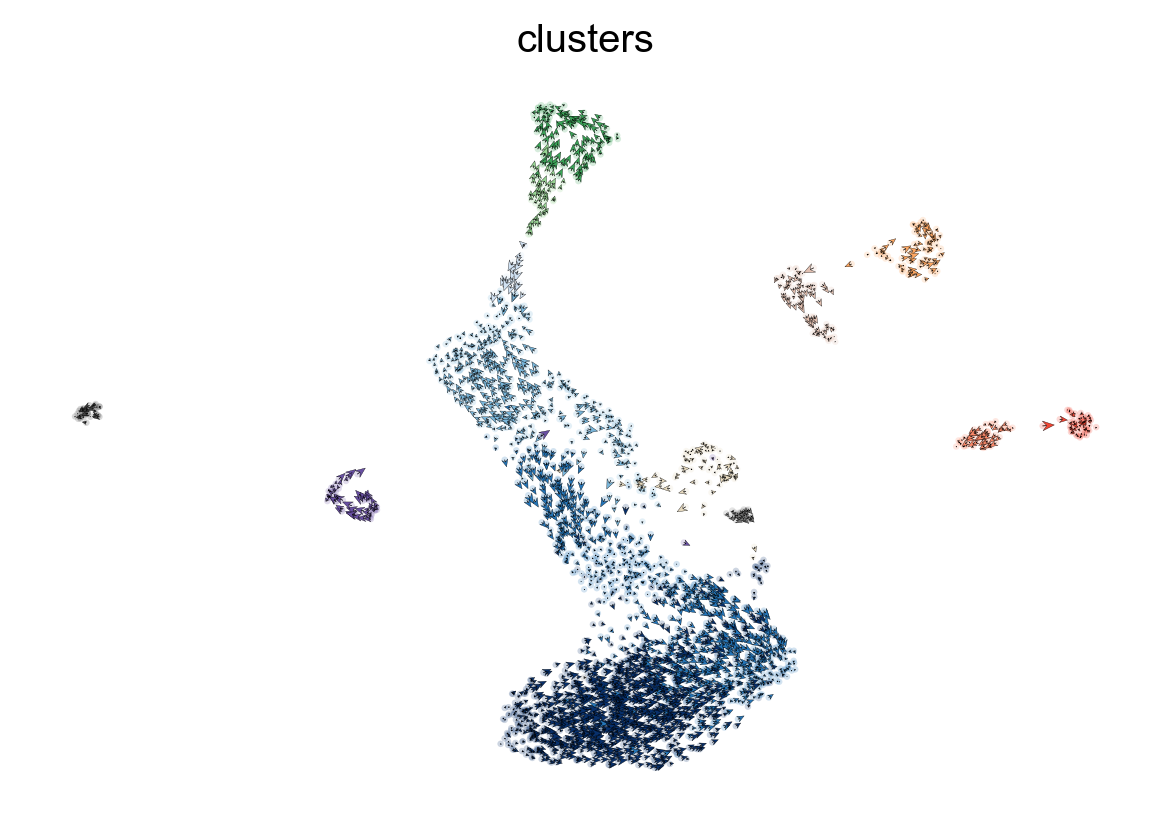

In [18]:
mc.acc_embedding(adata, basis = 'umap', arrow_length=3, arrow_size=2, dpi=120)

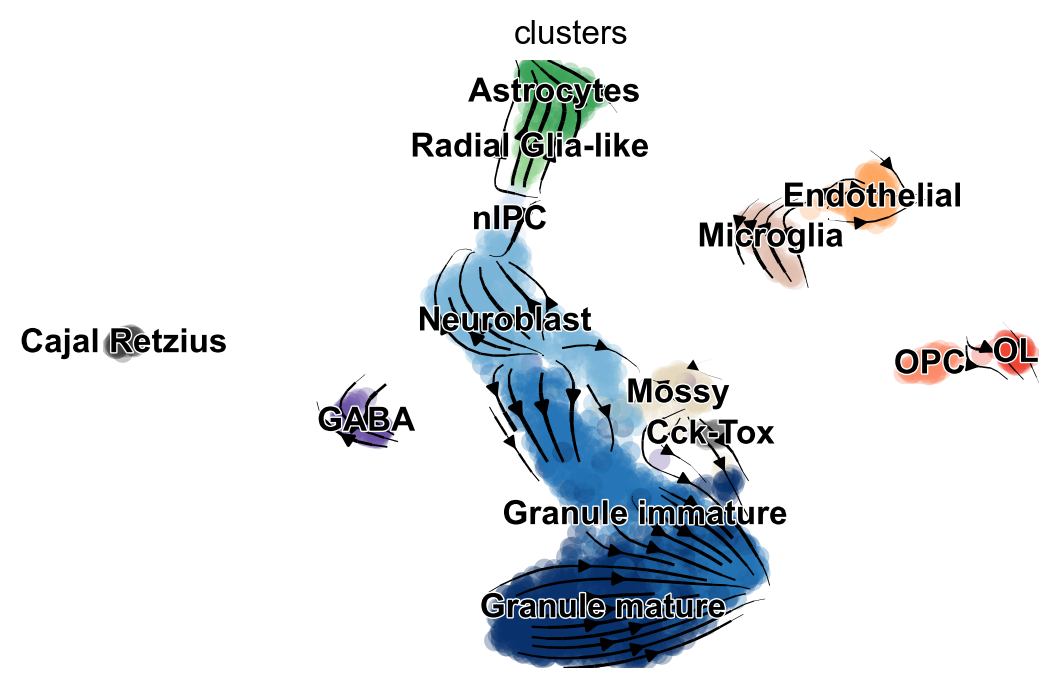

In [19]:
mc.acc_embedding_stream(adata)

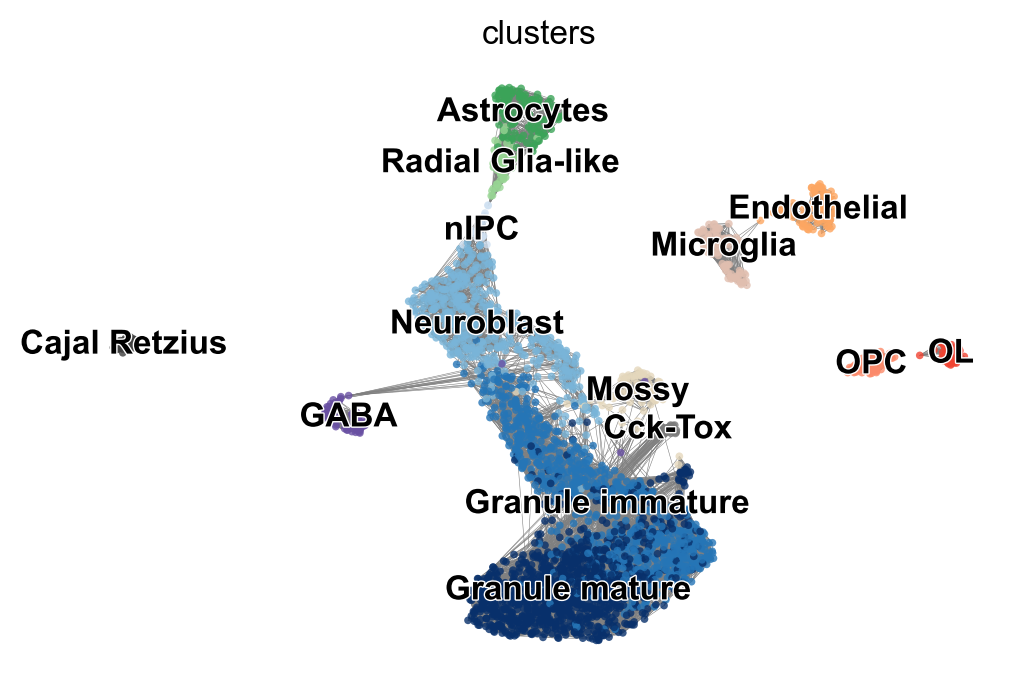

In [20]:
mc.acc_graph(adata)

In [21]:
adata.uns['neighbors']['distances'] = adata.obsp['distances']
adata.uns['neighbors']['connectivities'] = adata.obsp['connectivities']

mt.paga(adata, groups='clusters')
df = scv.get_df(adata, 'paga/transitions_confidence', precision=2).T
df.style.background_gradient(cmap='Blues').format('{:.2g}')

computing terminal states
    identified 3 regions of root cells and 6 regions of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
running PAGA using priors: ['acc_pseudotime']
    finished (0:00:02) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', acc transitions (adata.uns)


,Astrocytes,Cajal Retzius,Cck-Tox,Endothelial,GABA,Granule immature,Granule mature,Microglia,Mossy,Neuroblast,OL,OPC,Radial Glia-like,nIPC
Astrocytes,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cajal Retzius,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Cck-Tox,0,0,0,0,0,0,0.41,0,0.021,0,0,0,0,0
Endothelial,0,0,0,0,0,0,0,0.015,0,0,0,0,0,0
GABA,0,0,0.054,0,0,0,0,0,0,0,0,0,0,0
Granule immature,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Granule mature,0,0,0,0,0,0.56,0,0,0,0,0,0,0,0
Microglia,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mossy,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Neuroblast,0,0,0,0,0,0.087,0,0,0,0,0,0,0,0


C:\Users\Pradip\AppData\Roaming\Python\Python310\site-packages\networkx\convert.py:158: DeprecationWarning: 

The scipy.sparse array containers will be used instead of matrices
in Networkx 3.0. Use `from_scipy_sparse_array` instead.
  return nx.from_scipy_sparse_matrix(data, create_using=create_using)


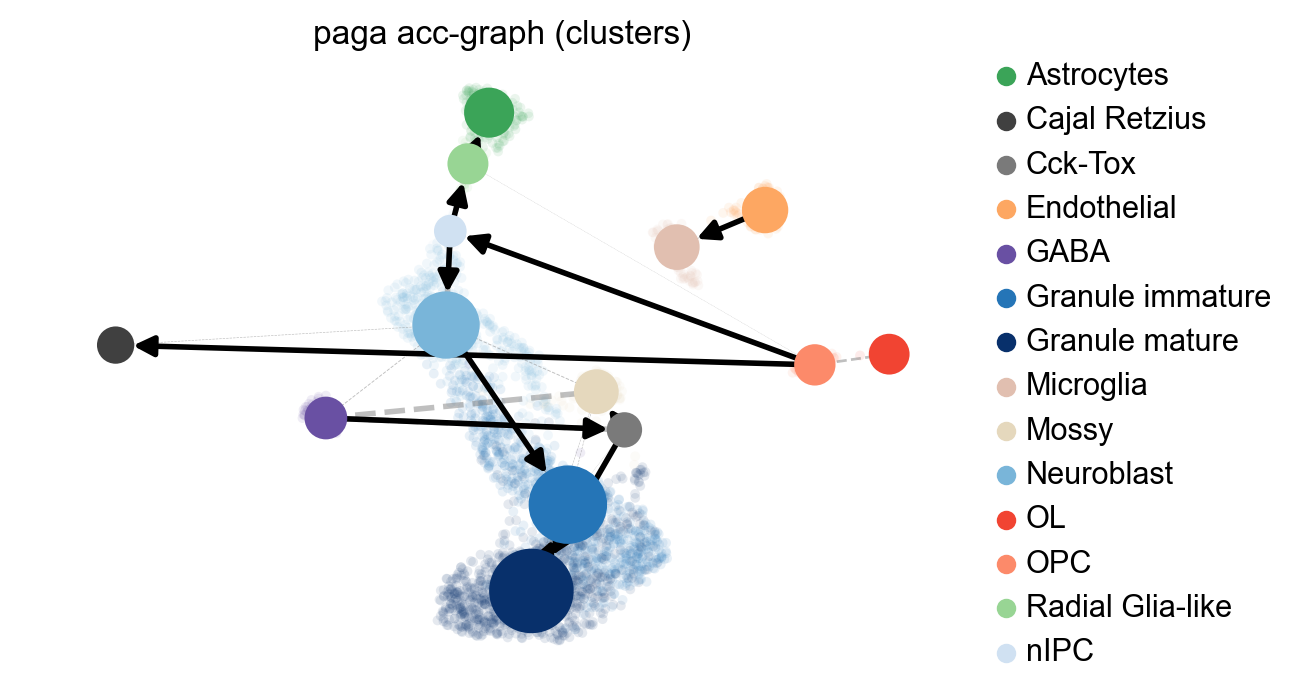

In [22]:
mc.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

--> added 'acc_length' (adata.obs)
--> added 'acc_confidence' (adata.obs)


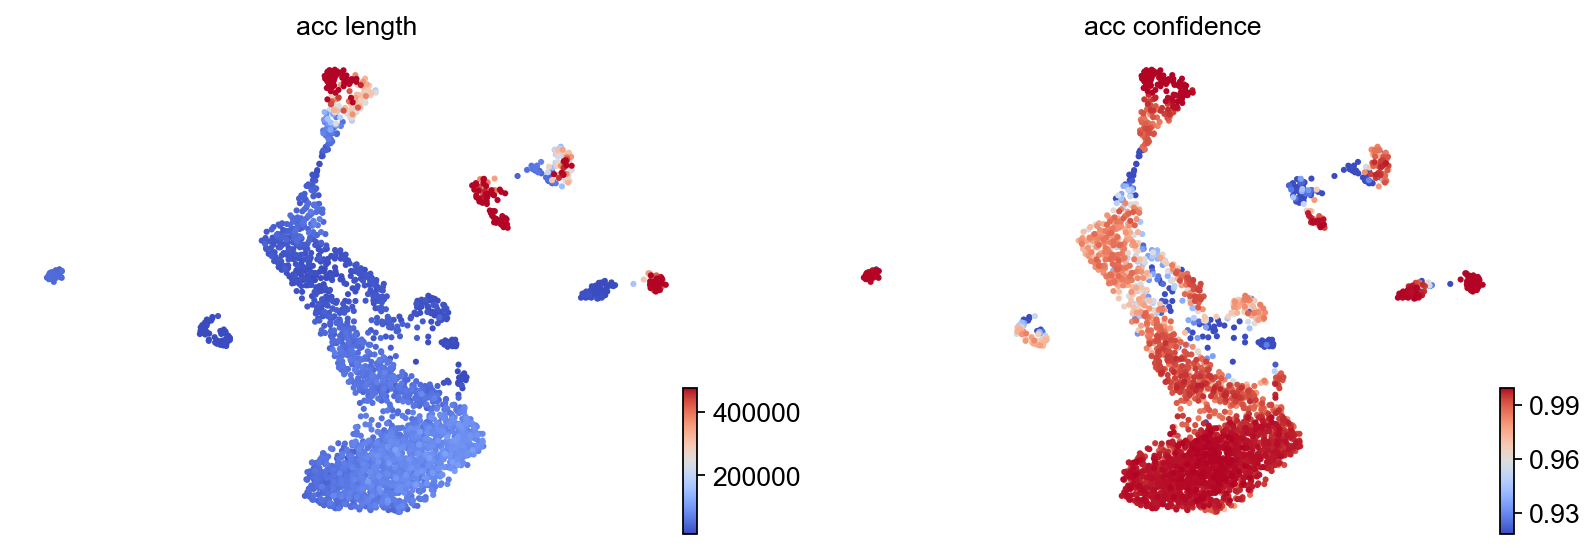

In [23]:
mt.acc_confidence(adata)
keys = 'acc_length', 'acc_confidence'
mc.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])